In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy import stats
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
# https://stackoverflow.com/a/37347783/7060068
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [2]:
# Let’s change the default plot size so we have a better view of our line plots:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

## 40 tasks, 5 actions, first-price auction, no-history, revenue as reward
- lr=0.0001,layers=[256, 256],train_batch_size=3000

In [10]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3040,11029.176309,5129.374216,14768.230488,11711.480781,9283.476213,14139.485348,9510.510427,3224.962498,15293.505921,11483.441487,9275.871729,14140.027961,22149.389392,22123.629415,22175.149369,17.210526,15,19,0.026316,0,1
6080,9300.302296,5407.930464,14157.334850,9498.511948,8716.712313,14139.485348,7583.644214,1281.681363,15293.505921,9468.989758,6971.538285,14138.016472,23217.970712,22123.629415,24602.091477,16.790000,14,19,0.050000,0,2
9120,9600.642385,4620.231280,15377.644269,9096.556859,7391.604312,10989.010779,7414.825776,2683.665125,14468.652406,9830.451059,6977.097351,13473.299362,23591.152466,21764.441608,25440.432812,16.220000,14,19,0.010000,0,1
12160,5951.118882,2364.325547,15377.644269,5061.893408,3502.944217,10989.010779,5253.882242,1307.579269,14468.652406,5223.627156,2558.690230,13152.999266,25800.664231,21764.441608,28094.958307,17.280000,14,20,0.050000,0,2
15200,6338.705455,2364.325547,11893.003432,4492.494509,2661.680789,6787.083488,5312.481427,1307.579269,11416.312169,4699.430426,2562.568019,8673.066527,24287.946858,23277.631104,28094.958307,17.900000,16,20,0.020000,0,2


number of trials = 11
numbler of rows of the results: 330


,Social Welfare (Online Myopic)_mean,Social Welfare (PPO)_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean,Social Welfare (Offline Optimal)_mean
3040,11711.480781,11029.176309,9510.510427,11483.441487,22149.389392
6080,9498.511948,9300.302296,7583.644214,9468.989758,23217.970712
9120,9096.556859,9600.642385,7414.825776,9830.451059,23591.152466
12160,5061.893408,5951.118882,5253.882242,5223.627156,25800.664231
15200,4492.494509,6338.705455,5312.481427,4699.430426,24287.946858


,timesteps,Online Myopic,MARL (PPO),Random Allocation,All Bidding Zero,Offline Optimal
0,3040,11711.480781,11029.176309,9510.510427,11483.441487,22149.389392
1,6080,9498.511948,9300.302296,7583.644214,9468.989758,23217.970712
2,9120,9096.556859,9600.642385,7414.825776,9830.451059,23591.152466
3,12160,5061.893408,5951.118882,5253.882242,5223.627156,25800.664231
4,15200,4492.494509,6338.705455,5312.481427,4699.430426,24287.946858


,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,11711.480781
1,6080,Online Myopic,9498.511948
2,9120,Online Myopic,9096.556859
3,12160,Online Myopic,5061.893408
4,15200,Online Myopic,4492.494509


(0.0, 27000.807281423524)

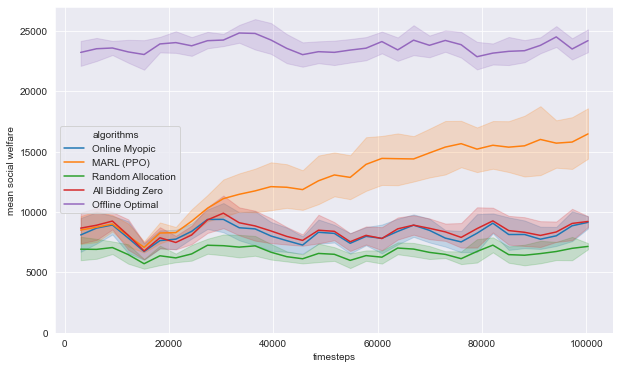

In [11]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, no-history, revenue as reward
- lr=0.0001,layers=[256, 256, 256],train_batch_size=3000

In [12]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3040,7158.029289,3180.163222,11395.387955,8298.254154,7549.323340,9047.184967,5972.806873,1590.279857,13871.127689,7374.883288,4917.720765,9050.379836,24036.107183,20759.029667,27313.184698,17.526316,16,19,0.026316,0,1
6080,7792.975981,3236.729725,13157.808900,9262.885503,7549.323340,10985.980141,6278.913354,2598.506218,12354.886093,7861.578826,4579.527432,12711.219865,24461.591277,20759.029667,27313.184698,17.560000,16,20,0.010000,0,1
9120,8757.110410,4589.546601,12914.198657,9789.888447,8149.031716,11427.388482,6012.791746,1497.112304,13361.219192,9025.849180,4655.372890,12711.219865,24424.358025,23980.451523,25001.762754,16.920000,15,19,0.000000,0,0
12160,8227.851291,4366.995853,12914.198657,8538.939828,6987.648452,11427.388482,5569.277626,1524.874764,10865.253506,8544.850653,4865.287526,11454.341569,22299.322009,19929.976666,24759.887694,16.250000,14,19,0.000000,0,0
15200,7049.656587,2860.209584,10780.809885,7541.489166,6098.421193,9255.805092,5756.425053,1752.317200,14033.987073,7400.669262,5070.337021,10762.389271,19707.310241,16495.867686,23360.763604,16.900000,15,19,0.020000,0,1


number of trials = 8
numbler of rows of the results: 129


,Social Welfare (Online Myopic)_mean,Social Welfare (PPO)_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean,Social Welfare (Offline Optimal)_mean
3040,8298.254154,7158.029289,5972.806873,7374.883288,24036.107183
6080,9262.885503,7792.975981,6278.913354,7861.578826,24461.591277
9120,9789.888447,8757.110410,6012.791746,9025.849180,24424.358025
12160,8538.939828,8227.851291,5569.277626,8544.850653,22299.322009
15200,7541.489166,7049.656587,5756.425053,7400.669262,19707.310241


,timesteps,Online Myopic,MARL (PPO),Random Allocation,All Bidding Zero,Offline Optimal
0,3040,8298.254154,7158.029289,5972.806873,7374.883288,24036.107183
1,6080,9262.885503,7792.975981,6278.913354,7861.578826,24461.591277
2,9120,9789.888447,8757.110410,6012.791746,9025.849180,24424.358025
3,12160,8538.939828,8227.851291,5569.277626,8544.850653,22299.322009
4,15200,7541.489166,7049.656587,5756.425053,7400.669262,19707.310241


,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8298.254154
1,6080,Online Myopic,9262.885503
2,9120,Online Myopic,9789.888447
3,12160,Online Myopic,8538.939828
4,15200,Online Myopic,7541.489166


(0.0, 28829.986069374037)

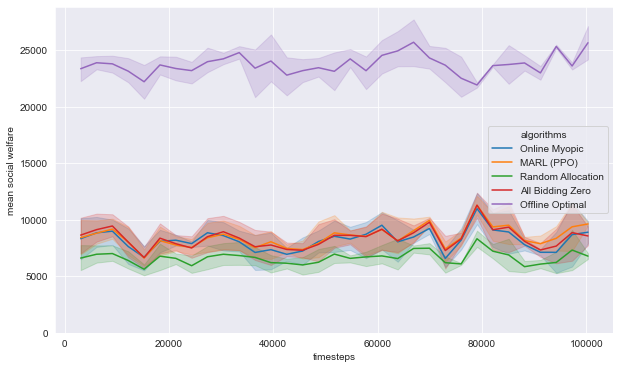

In [13]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, no-history, revenue as reward
- lr=0.001,layers=[256, 256],train_batch_size=3000

In [20]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.001,layers=[256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3040,8235.299028,3695.392393,16188.284907,8195.637576,5470.501811,10920.773341,6988.237926,1450.034431,16159.038118,8207.356194,4301.371319,10923.224253,24476.286878,23351.350719,25601.223036,16.381579,14,19,0.026316,0,2
6080,12044.193369,3827.024170,17647.988670,12511.512678,5470.501811,15788.089489,9326.172775,1449.085030,17300.661546,12503.427644,4360.284610,15827.460101,25687.226875,23351.350719,28703.168014,16.280000,14,19,0.000000,0,0
9120,9067.024617,2855.977584,15821.182016,9083.881753,5036.259717,15788.089489,6623.592887,1163.672415,17300.661546,9617.374865,5016.306298,15827.460101,22227.769771,19262.825774,28703.168014,15.750000,14,18,0.090000,0,2
12160,6440.342137,3741.716210,11690.764516,6511.830634,5036.259717,10105.900303,4989.381516,1286.687688,10263.611889,6520.422665,4043.855126,11568.214039,21692.148890,19262.825774,22766.276373,16.160000,14,19,0.050000,0,2
15200,6612.621052,2844.517008,11591.660622,6197.324072,4888.112954,7519.162499,5381.942472,1491.603049,14136.507095,6516.282172,2918.163198,11349.149068,25254.902848,21265.579703,28012.634832,17.320000,14,19,0.010000,0,1


number of trials = 11
numbler of rows of the results: 318


,Social Welfare (Online Myopic)_mean,Social Welfare (PPO)_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean,Social Welfare (Offline Optimal)_mean
3040,8195.637576,8235.299028,6988.237926,8207.356194,24476.286878
6080,12511.512678,12044.193369,9326.172775,12503.427644,25687.226875
9120,9083.881753,9067.024617,6623.592887,9617.374865,22227.769771
12160,6511.830634,6440.342137,4989.381516,6520.422665,21692.148890
15200,6197.324072,6612.621052,5381.942472,6516.282172,25254.902848


,timesteps,Online Myopic,MARL (PPO),Random Allocation,All Bidding Zero,Offline Optimal
0,3040,8195.637576,8235.299028,6988.237926,8207.356194,24476.286878
1,6080,12511.512678,12044.193369,9326.172775,12503.427644,25687.226875
2,9120,9083.881753,9067.024617,6623.592887,9617.374865,22227.769771
3,12160,6511.830634,6440.342137,4989.381516,6520.422665,21692.148890
4,15200,6197.324072,6612.621052,5381.942472,6516.282172,25254.902848


,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8195.637576
1,6080,Online Myopic,12511.512678
2,9120,Online Myopic,9083.881753
3,12160,Online Myopic,6511.830634
4,15200,Online Myopic,6197.324072


(0.0, 26996.756368721446)

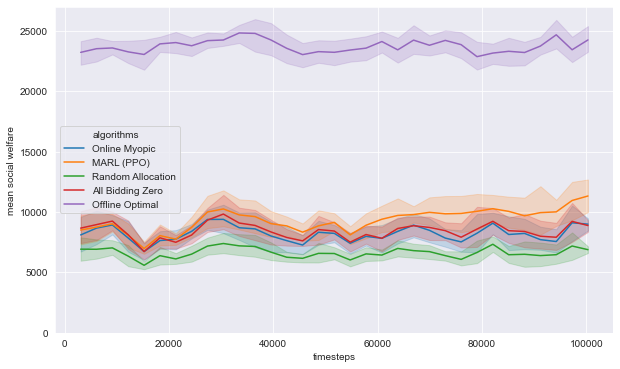

In [21]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, with-history, revenue as reward
- lr=0.0001,layers=[256, 256],train_batch_size=3000

In [22]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3040,9487.690206,3116.273282,13735.453224,10495.158887,8494.395689,12495.922086,8031.804447,1357.786557,16083.912269,9723.387696,3164.398896,12499.146809,22915.014203,21344.956110,24485.072296,16.789474,15,19,0.0,0,0
6080,8215.918499,3164.501156,12881.255069,9263.387683,7872.387949,12495.922086,7164.660335,1357.786557,13197.801002,8446.846941,3164.398896,12499.146809,22311.553359,20517.990834,24485.072296,16.890000,14,19,0.0,0,0
9120,10642.572180,4562.053500,15520.250008,10516.193752,7872.387949,13237.639909,8427.104610,3110.736962,16019.929492,10984.987004,4590.228654,15506.429515,22899.738006,20517.990834,23723.982719,16.950000,14,20,0.0,0,0
12160,8161.205243,3709.413473,13856.632509,8533.106263,7518.696362,13237.639909,6457.845444,2366.984846,13101.639414,8473.255287,4183.217330,13861.240864,23248.192173,22623.440962,23937.700896,16.920000,15,18,0.0,0,0
15200,9847.390088,4191.132305,16488.849933,9098.833038,7518.696362,9692.750085,7678.536363,2851.289360,16685.410973,10187.539734,4187.544271,16479.199164,23687.469852,22151.769006,25480.159493,16.350000,14,18,0.0,0,0


number of trials = 11
numbler of rows of the results: 330


,Social Welfare (Online Myopic)_mean,Social Welfare (PPO)_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean,Social Welfare (Offline Optimal)_mean
3040,10495.158887,9487.690206,8031.804447,9723.387696,22915.014203
6080,9263.387683,8215.918499,7164.660335,8446.846941,22311.553359
9120,10516.193752,10642.572180,8427.104610,10984.987004,22899.738006
12160,8533.106263,8161.205243,6457.845444,8473.255287,23248.192173
15200,9098.833038,9847.390088,7678.536363,10187.539734,23687.469852


,timesteps,Online Myopic,MARL (PPO),Random Allocation,All Bidding Zero,Offline Optimal
0,3040,10495.158887,9487.690206,8031.804447,9723.387696,22915.014203
1,6080,9263.387683,8215.918499,7164.660335,8446.846941,22311.553359
2,9120,10516.193752,10642.572180,8427.104610,10984.987004,22899.738006
3,12160,8533.106263,8161.205243,6457.845444,8473.255287,23248.192173
4,15200,9098.833038,9847.390088,7678.536363,10187.539734,23687.469852


,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,10495.158887
1,6080,Online Myopic,9263.387683
2,9120,Online Myopic,10516.193752
3,12160,Online Myopic,8533.106263
4,15200,Online Myopic,9098.833038


(0.0, 26896.478741417355)

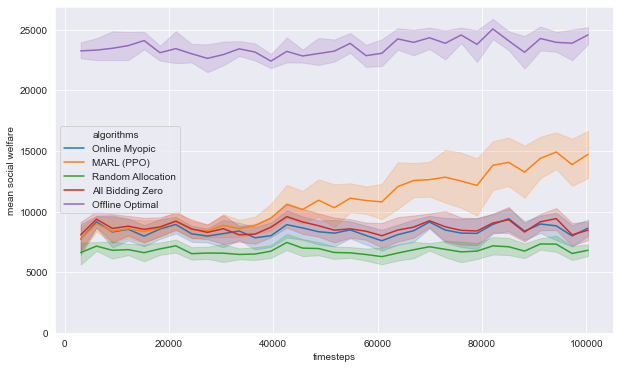

In [23]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, first-price auction, with-history, revenue as reward
- lr=0.0001,layers=[256, 256],train_batch_size=4000

In [24]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=4000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
4560,8455.342545,2485.225265,16062.725766,8839.617013,5525.992298,11422.684042,6333.379905,1505.355651,14431.977833,9105.323149,5521.186546,16029.262982,24331.663782,21964.598907,26575.815672,16.666667,14,18,0.008772,0,1
9120,9446.952050,2611.952814,15981.129549,10086.516209,3812.961600,15560.894685,7637.951676,1593.261103,15575.701528,9791.284271,3810.804597,15561.651922,24554.902138,21378.917179,26273.185275,16.245614,13,19,0.008772,0,1
13680,8624.399440,3836.061993,14838.130368,8139.925896,5063.679752,11310.634137,6950.156428,1633.302515,14751.687261,9354.091895,3867.216601,13722.281229,21279.903328,17722.017895,25661.189744,15.754386,14,18,0.017544,0,1
18240,9593.062731,4040.541759,15113.099151,10086.157882,6984.634330,13942.621339,7417.504625,2619.439185,13116.568490,9619.107557,4030.241840,14006.376411,22594.802785,19946.841922,25791.226506,16.289474,14,18,0.026316,0,2
22800,8193.986141,4246.567424,12903.319700,6891.141337,4278.579995,9818.750420,6686.913825,1401.871157,12752.265347,7591.819901,4274.638526,11108.951865,21490.797311,21351.507392,21749.477000,16.991228,15,19,0.000000,0,0


number of trials = 5
numbler of rows of the results: 62


,Social Welfare (Online Myopic)_mean,Social Welfare (PPO)_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean,Social Welfare (Offline Optimal)_mean
4560,8839.617013,8455.342545,6333.379905,9105.323149,24331.663782
9120,10086.516209,9446.952050,7637.951676,9791.284271,24554.902138
13680,8139.925896,8624.399440,6950.156428,9354.091895,21279.903328
18240,10086.157882,9593.062731,7417.504625,9619.107557,22594.802785
22800,6891.141337,8193.986141,6686.913825,7591.819901,21490.797311


,timesteps,Online Myopic,MARL (PPO),Random Allocation,All Bidding Zero,Offline Optimal
0,4560,8839.617013,8455.342545,6333.379905,9105.323149,24331.663782
1,9120,10086.516209,9446.952050,7637.951676,9791.284271,24554.902138
2,13680,8139.925896,8624.399440,6950.156428,9354.091895,21279.903328
3,18240,10086.157882,9593.062731,7417.504625,9619.107557,22594.802785
4,22800,6891.141337,8193.986141,6686.913825,7591.819901,21490.797311


,timesteps,algorithms,mean social welfare
0,4560,Online Myopic,8839.617013
1,9120,Online Myopic,10086.516209
2,13680,Online Myopic,8139.925896
3,18240,Online Myopic,10086.157882
4,22800,Online Myopic,6891.141337


(0.0, 26986.36506985182)

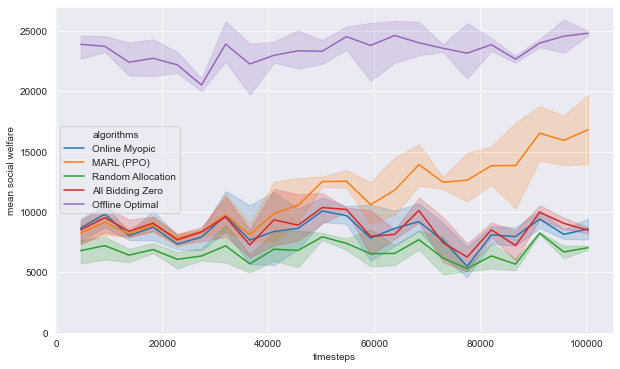

In [25]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

## 40 tasks, 5 actions, second-price auction, no-history, revenue as reward
- lr=0.0001,layers=[256, 256, 256],train_batch_size=3000

In [40]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_second-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256, 256],train_batch_size=3000_2021-12-10'

df_results = pd.DataFrame()
results = []
cntr=1
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    cntr+=1
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results.head()

df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare (PPO)_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean',
                        'Social Welfare (Offline Optimal)_mean']]
print(f"number of trials = {cntr}")
print(f"numbler of rows of the results: {len(df_results)}")
df_results.head()

# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare (PPO)_mean": "MARL (PPO)",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero",
                                                   "Social Welfare (Offline Optimal)_mean": "Offline Optimal"}, errors='raise')

df_results_reset.head()

# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

df_results_preproc.head()

,Social Welfare (PPO)_mean,Social Welfare (PPO)_min,Social Welfare (PPO)_max,Social Welfare (Online Myopic)_mean,Social Welfare (Online Myopic)_min,Social Welfare (Online Myopic)_max,Social Welfare (Random Allocation)_mean,Social Welfare (Random Allocation)_min,Social Welfare (Random Allocation)_max,Social Welfare (All Bidding Zero)_mean,Social Welfare (All Bidding Zero)_min,Social Welfare (All Bidding Zero)_max,Social Welfare (Offline Optimal)_mean,Social Welfare (Offline Optimal)_min,Social Welfare (Offline Optimal)_max,Allocated Tasks Number (PPO)_mean,Allocated Tasks Number (PPO)_min,Allocated Tasks Number (PPO)_max,Bad Allocations Number (PPO)_mean,Bad Allocations Number (PPO)_min,Bad Allocations Number (PPO)_max
3040,9319.356323,3347.583564,14237.353600,10272.265485,9347.959685,11196.571285,7321.878855,1638.697526,14448.750111,9889.985585,4597.486433,12913.089201,24639.723981,21773.880523,27505.567439,17.105263,15,19,0.00,0,0
6080,9362.432237,3350.391775,13672.305174,9763.226997,8305.003212,11196.571285,7483.798124,1338.687137,15012.166420,9760.325282,4882.293495,12913.089201,25297.967627,21773.880523,27505.567439,16.540000,14,19,0.07,0,2
9120,10536.924184,5365.820977,18103.669156,11241.465332,8305.003212,12636.696333,9216.331017,2495.797108,16845.803617,10879.686646,5429.160207,12799.550344,25189.292087,23201.894423,26976.768518,16.800000,14,19,0.01,0,1
12160,9699.512541,5434.331035,16433.624248,8942.180476,7209.044058,12636.696333,7868.554062,1603.841239,15657.850148,9811.107646,6039.298136,12798.700053,25451.401771,23198.699389,27932.780132,16.570000,15,19,0.00,0,0
15200,9511.192169,3066.943980,15968.973803,11024.531226,7209.044058,14139.485348,6747.345250,1379.273653,12409.954645,9969.357944,4625.644375,14140.027961,24372.127740,22123.629415,27932.780132,16.900000,15,19,0.00,0,0


number of trials = 11
numbler of rows of the results: 264


,Social Welfare (Online Myopic)_mean,Social Welfare (PPO)_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean,Social Welfare (Offline Optimal)_mean
3040,10272.265485,9319.356323,7321.878855,9889.985585,24639.723981
6080,9763.226997,9362.432237,7483.798124,9760.325282,25297.967627
9120,11241.465332,10536.924184,9216.331017,10879.686646,25189.292087
12160,8942.180476,9699.512541,7868.554062,9811.107646,25451.401771
15200,11024.531226,9511.192169,6747.345250,9969.357944,24372.127740


,timesteps,Online Myopic,MARL (PPO),Random Allocation,All Bidding Zero,Offline Optimal
0,3040,10272.265485,9319.356323,7321.878855,9889.985585,24639.723981
1,6080,9763.226997,9362.432237,7483.798124,9760.325282,25297.967627
2,9120,11241.465332,10536.924184,9216.331017,10879.686646,25189.292087
3,12160,8942.180476,9699.512541,7868.554062,9811.107646,25451.401771
4,15200,11024.531226,9511.192169,6747.345250,9969.357944,24372.127740


,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,10272.265485
1,6080,Online Myopic,9763.226997
2,9120,Online Myopic,11241.465332
3,12160,Online Myopic,8942.180476
4,15200,Online Myopic,11024.531226


(0.0, 26999.852017486053)

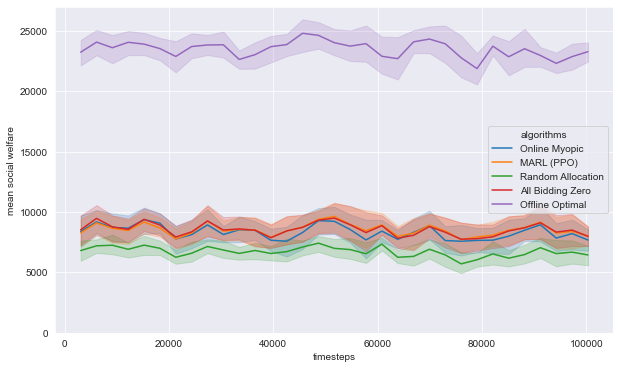

In [41]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [33]:
1/0

ZeroDivisionError: division by zero

In [11]:
1/0

ZeroDivisionError: division by zero

## 40 tasks, 5 actions, second-price auction, no-history

In [12]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_second-price_no-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [13]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

655


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3040,8640.773339,8452.264264,6404.284647,8779.088468
6080,8757.684258,8805.344592,6947.747288,8989.756090
9120,8776.057173,8817.235200,7196.662877,9021.143098
12160,8921.955934,9172.658908,7601.341139,9132.610963
15200,8881.442048,9489.403029,7369.439795,9122.241496
18240,8857.494443,9239.374862,7433.993057,9105.549611
21280,8829.096817,9182.749451,7073.002278,8762.774168
24320,8992.114610,9457.702548,7353.907921,8948.613489
27360,9142.477279,10161.631379,7343.150500,9202.254750
30400,9034.594906,10397.998789,6837.179562,9172.349845


In [14]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [15]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [16]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3040,8640.773339,8452.264264,6404.284647,8779.088468
1,6080,8757.684258,8805.344592,6947.747288,8989.756090
2,9120,8776.057173,8817.235200,7196.662877,9021.143098
3,12160,8921.955934,9172.658908,7601.341139,9132.610963
4,15200,8881.442048,9489.403029,7369.439795,9122.241496


In [17]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [18]:
df_results_preproc.head()

,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8640.773339
1,6080,Online Myopic,8757.684258
2,9120,Online Myopic,8776.057173
3,12160,Online Myopic,8921.955934
4,15200,Online Myopic,8881.442048


(0.0, 21359.901528818955)

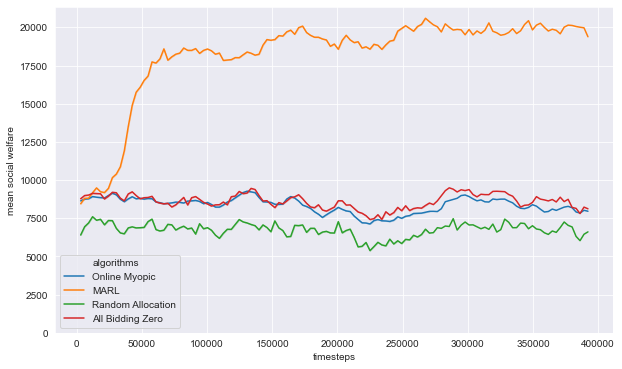

In [19]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [20]:
1/0

ZeroDivisionError: division by zero

## 40 tasks, 5 actions, first-price auction, with-history

In [21]:
# get all names from the folder
# https://stackoverflow.com/a/29206464/7060068
import os

path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/5-actions_first-price_with-history_revenue'
dir_list = os.listdir(path)
# print(dir_list)

In [22]:
# read results in .json files
import json

hyperparamter_string = 'lr=0.0001,layers=[256, 256],train_batch_size=3000'

df_results = pd.DataFrame()
results = []
for folder in dir_list:
    file_path = f'{path}/{folder}/result.json'
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    # load data using Python JSON module
#     print(file_path)
    with open(file_path) as f:
        # json.loads (and json.load) does not decode multiple json object. So load each line at a time.
        # https://stackoverflow.com/a/29312618/7060068
        for line in f:
            data = json.loads(line)
#             print(data)
#             break
            data_row = data['custom_metrics']

    #         df = pd.DataFrame.from_dict(data, index=0)
            # https://stackoverflow.com/a/17840195/7060068
            df = pd.DataFrame(data_row, index=[data['timesteps_total']])
            results.append(df)

df_results = pd.concat(results, axis=0)
df_results = df_results[['Social Welfare (Online Myopic)_mean', 'Social Welfare_mean', 
                         'Social Welfare (Random Allocation)_mean', 'Social Welfare (All Bidding Zero)_mean']]
print(len(df_results))
df_results.head(10)

586


,Social Welfare (Online Myopic)_mean,Social Welfare_mean,Social Welfare (Random Allocation)_mean,Social Welfare (All Bidding Zero)_mean
3040,8640.773339,8462.391497,6492.509254,8599.240576
6080,8757.684258,8593.301367,7253.360639,8886.890743
9120,8776.057173,8934.016218,7123.834885,9062.584631
12160,8921.955934,8919.788484,6642.982766,9245.420362
15200,8881.442048,9114.418362,6575.005541,9063.297978
18240,8857.494443,9136.872559,7071.745767,8985.889501
21280,8829.096817,9017.794019,6719.019957,8785.241327
24320,8992.114610,9151.091319,7394.897050,8576.451693
27360,9142.477279,9541.092628,7430.186368,8980.617244
30400,9034.594906,9483.944557,6992.234351,9010.037771


In [23]:
# make the number of timesteps as a new column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
df_results_reset = df_results.copy()
df_results_reset = df_results_reset.reset_index(col_fill='timesteps')

In [24]:
# change the name of the first column from `index` to `timesteps`
df_results_reset = df_results_reset.rename(columns={"index": "timesteps", 
                                                   "Social Welfare (Online Myopic)_mean": "Online Myopic",
                                                   "Social Welfare_mean": "MARL",
                                                   "Social Welfare (Random Allocation)_mean": "Random Allocation",
                                                   "Social Welfare (All Bidding Zero)_mean": "All Bidding Zero"}, errors='raise')

In [25]:
df_results_reset.head()

,timesteps,Online Myopic,MARL,Random Allocation,All Bidding Zero
0,3040,8640.773339,8462.391497,6492.509254,8599.240576
1,6080,8757.684258,8593.301367,7253.360639,8886.890743
2,9120,8776.057173,8934.016218,7123.834885,9062.584631
3,12160,8921.955934,8919.788484,6642.982766,9245.420362
4,15200,8881.442048,9114.418362,6575.005541,9063.297978


In [26]:
# make a dataframe for plotting several lines in one figure
# https://stackoverflow.com/a/55579762/7060068

df_results_preproc = pd.melt(df_results_reset, ['timesteps'], var_name='algorithms',
                            value_name='mean social welfare')

In [27]:
df_results_preproc.head()

,timesteps,algorithms,mean social welfare
0,3040,Online Myopic,8640.773339
1,6080,Online Myopic,8757.684258
2,9120,Online Myopic,8776.057173
3,12160,Online Myopic,8921.955934
4,15200,Online Myopic,8881.442048


(0.0, 19995.47805837643)

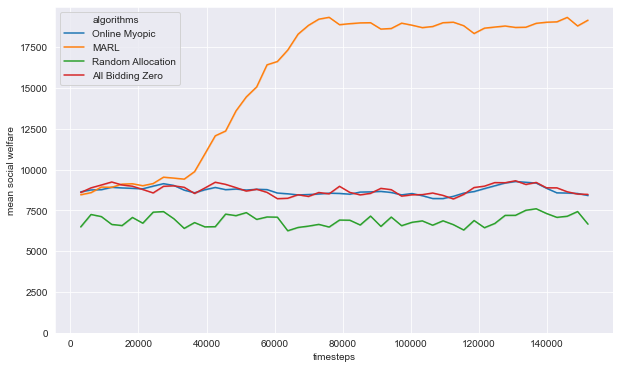

In [28]:
# plot the results all in one figure
# https://stackoverflow.com/a/55579762/7060068
p = sns.lineplot(x='timesteps', y='mean social welfare', hue='algorithms', 
                 data=df_results_preproc)  # 2 actions (blue)
p.axes.set_ylim(0)

In [20]:
1/0

ZeroDivisionError: division by zero

### Online Myopic

In [ ]:
# plot the confidence interval for the mean
# https://stackoverflow.com/a/44941463/7060068

p = sns.lineplot(x=df_results.index, y='Social Welfare (Online Myopic)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
# https://stackoverflow.com/a/57101557/7060068
p.axes.set_ylim(0)

### All Bidding Zero

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (All Bidding Zero)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### MARL

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

### Random Allocation

In [ ]:
p = sns.lineplot(x=df_results.index, y='Social Welfare (Random Allocation)_mean', data=df_results)  # 2 actions (blue)
p.set_xlabel("Timesteps", fontsize = 14)
p.set_ylabel("Mean Social Welfare", fontsize = 14)
p.axes.set_ylim(0)

In [ ]:
1/0

## Use data from the progress.csv file.

In [ ]:
# load from file
# https://thispointer.com/python-three-ways-to-check-if-a-file-is-empty/
# concatenating df1 and df2 along rows
# vertical_concat = pd.concat([df1, df2], axis=0)
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
print(len(df_results))
df_results.head()

In [ ]:
df_results1 = df_results

In [ ]:
path = '/Users/fan/OneDrive - University of Southampton/My-Projects/Edge-Cloud-Resource-Allocation/marl-edge-cloud/results/edge_cloud_independent_ppo_with_history_2_actions'
dir_list = os.listdir(path)
hyperparamter_string = 'lr=0.0001,train_batch_size=3000'
df_results = pd.DataFrame()
for folder in dir_list:
    file_path = f'{path}/{folder}/progress.csv'
    if not os.path.isfile(file_path):  # jump over useless paths
        continue
    if hyperparamter_string not in file_path:  # only consider the specific hyperparameters combination 
        continue
    with open (file_path) as f:
        if os.stat(file_path).st_size != 0:
            df_f = pd.read_csv(f)
            if df_results.empty:
                df_results = df_f
            else:
                df_results = df_results.append(df_f, ignore_index = True)

In [ ]:
# plot the confidence interval for the mean
# dont't have customised measurements in the progress.csv file, maybe we need to get data from the *.json file.
sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results)  # 2 actions (blue)
# sns.lineplot(x='timesteps_total',y='episode_reward_mean', data=df_results1)  # 5 actions (yellow)

In [ ]:
# test if some file is missing
oo = {}
NoT = 40 # number of tasks in the whole time period
NoS = 60 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(30,NoS):
            f = open('simulation_results_ILP\\s2(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
           
            f.close()

In [ ]:
# print the value of the file
NoT = 20 # number of tasks in the whole time period
NoS = 23 # number of samples
F = 8.0
k = 0.35


f = open('simulation_results_ILP\\fog(tm)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(float(row[0]))
f.close()

In [ ]:
# get the data
oo = {}
NoT = 20 # number of tasks in the whole time period
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP\\oo(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                oo['sw', NoT, k, F, i] = float(row[0])
            f.close()

# s2 = {}
# NoT = 20
# NoS = 100 # number of samples
# for F in [8.0]:
#     for k in [0.35, 0.4, 0.45]:
#         for i in range(1,NoS+1):
#             f = open('simulation_results_ILP\s2(sw)'
#                                                  +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
#             csv_f = csv.reader(f)
#             for row in csv_f:
#                 s2['sw', NoT, k, F, i] = float(row[0])
#             f.close()

og = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/og(sw)'
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                og['sw', NoT, k, F, i] = float(row[0])
            f.close()
            
fog = {}
NoT = 20
NoS = 100 # number of samples
for F in [8.0]:
    for k in [0.35, 0.4, 0.45]:
        for i in range(NoS):
            f = open('simulation_results_ILP/fog(sw)' 
                                                 +'_'+str(NoT)+'_'+str(k)+'_'+str(F)+'_'+str(i)+'.csv')
            csv_f = csv.reader(f)
            for row in csv_f:
                fog['sw', NoT, k, F, i] = float(row[0])
            f.close()

In [ ]:
# whe F = 8 construct a dataframe
d = {}
F = 8.0
NoT = 20

for k in [0.35, 0.4, 0.45]:
    d[k] = [oo['sw', NoT, k, F, i] for i in range(10)]
result_oo = pd.DataFrame(data=d)
# print(result_oo)
# for k in [0.35, 0.4, 0.45]:
#     d[k] = [s2['sw', NoT, k, F, i] for i in range(10)]
# result_s2 = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [og['sw', NoT, k, F, i] for i in range(10)]
result_og = pd.DataFrame(data=d)

# online greedy：
for k in [0.35, 0.4, 0.45]:
    d[k] = [fog['sw', NoT, k, F, i] for i in range(10)]
result_fog = pd.DataFrame(data=d)

In [ ]:
result_oo.head()
result_fog.head()

In [ ]:
mean_oo = result_oo.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_oo = result_oo.std(axis = 0)  

mean_og = result_og.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_og = result_og.std(axis = 0)  

mean_fog = result_fog.mean(axis = 0)
# pd.DataFrame.std: Return sample standard deviation
std_fog = result_fog.std(axis = 0)  

In [ ]:
stats.t.ppf(1-0.025, NoS -1)

In [ ]:
# Degrees of Freedom = n – 1, 
plt.errorbar(mean_oo.index, mean_oo, xerr = 0, 
             yerr = std_oo / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_og.index, mean_og, xerr = 0, 
             yerr = std_og / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)
plt.errorbar(mean_fog.index, mean_fog, xerr = 0, 
             yerr = std_fog / np.sqrt(NoS) * stats.t.ppf(1-0.025, NoS -1), uplims =True, lolims = True)

# plt.errorbar(mean_sp.index, mean_sp, xerr = 0, yerr = std_sp * 2.024, uplims =True, lolims = True)
# plt.errorbar(mean_ogwf.index, mean_ogwf, xerr = 0, yerr = std_ogwf * 2.201, uplims =True, lolims = True)

# plt.legend(['offline optimal','online greedy','SWMOA', 'flexible online greedy'], loc = 'lower right')
plt.legend(['offline optimal','online greedy','flexible online greedy'],
           loc = 'lower right')
plt.xlabel("resource coefficient")
plt.ylabel("social welfare")

# setting y axis limit
axes = plt.gca()
# axes.set_ylim([0,150])

plt.show
# plt.savefig('comparison of four algorithms.png')

In [ ]:
figure = result_oo.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure

In [ ]:
result_ogf = pd.read_csv("ogf.csv", names =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
result_ogf

In [ ]:
figure = result_ogf.boxplot(column = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], grid = False)
figure